# Actividad 5 - Pruebas de Hipótesis

Frida Cano Falcón - A01752953

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/7mo Semestre/Estadistica"
!ls

Mounted at /content/drive
/content/drive/MyDrive/Semestres/7mo Semestre/Estadistica
 Act1_Distribuciones_FridaCano_A01752953.ipynb
 Act2_ExplorandoBases_FridaCano_A01752953.ipynb
 Act3_Transformaciones_FridaCanoFalcon_A01752953.ipynb
 Act4_IntervalosConfianza_FridaCanoFalcon_A01752953.ipynb
 Act5_PruebasHipotesis_FridaCanoFalcon_A01752953.ipynb
'El marcapasos.csv'
 mc-donalds-menu-1.csv
 precios_autos.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import t
# Importing library
from scipy.stats import skew, kurtosis

## Problema Enlatados
###Prueba 1 - Hipótesis
$H_{0}: 𝜇  = 11.7$

$H_{1}: 𝜇  \neq 11.7$

###Prueba 2 - Regla de decisión

En el problema nos indican el nivel de confianza $1 - α = 0.98$, entonces $α = 0.02$.

Utilizaremos una $t de Student$ porque no conocemos el valor de σ (desviación estándar poblacional) y el tamaño de muestra es pequeño ($n<30$).

Para calcular el valor de $t_{0}$ de la region de rechazo:


In [ ]:
alfa = 0.02
n = 21  # Tamaño de la muestra
t0 = t.ppf(alfa / 2, n - 1)  # alfa se divide entre 2 porque es una prueba de dos colas
print("t0 =", t0)

t0 = -2.5279770027405464


Enotnces se rechaza $H_{0}$ si:
*   El valor $p < α <= 0.02 $
*   Si $|t*|>|t_{0}|, es decir, |t*|>2.528$

### Paso 3 - Análisis muestra

Para analizar la muestra, necesitamos calcular $t*$ y el valor de $p$.


In [ ]:
from scipy import stats

X = np.array([11, 11.6, 11.6, 11.7, 10.9, 11.6, 12, 11.2, 11.5, 12, 12, 11.4, 11.2, 10.8, 10.5, 11.8, 12.2, 10.9, 11.8, 11.4, 12.1])
m = np.mean(X)
s = np.std(X, ddof=1)  # Usamos ddof=1 para calcular la desviación estándar muestral
n = len(X)

print("La media de la muestra es", m)
print("La desviación de la muestra es", s)

sm = s / np.sqrt(n)  # Desviación estándar de la media de la muestra (error estándar)
print("La desviación estándar de la media de la muestra (error estándar) es", sm)

te = (m - 11.7) / sm
print("\nt* =", te)

valor_p = 2 * stats.t.cdf(te, df=n-1)
print("Valor p =", valor_p)

La media de la muestra es 11.485714285714286
La desviación de la muestra es 0.4746427227775795
La desviación estándar de la media de la muestra (error estándar) es 0.10357553358039041

t* = -2.068883517934234
Valor p = 0.051729895013436986


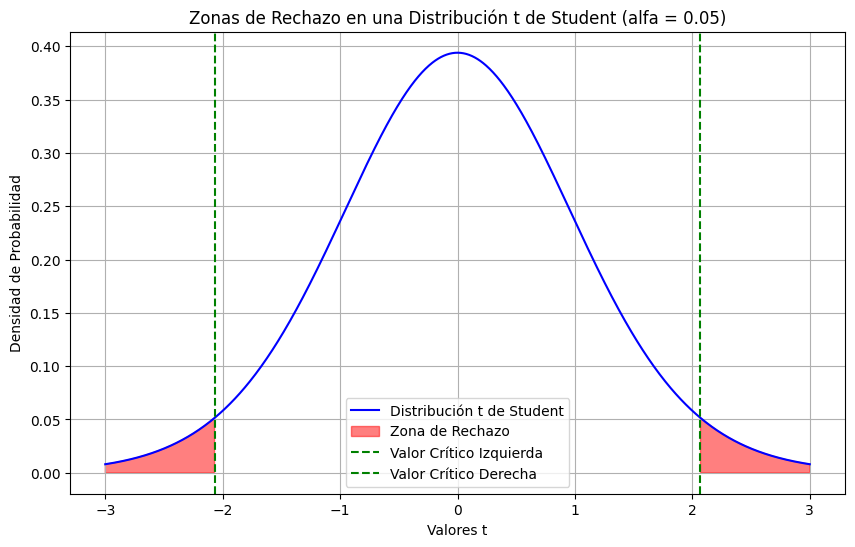

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Nivel de significancia (alfa)
alfa = valor_p

# Grados de libertad (puedes ajustar esto según tu prueba)
grados_libertad = 20

# Crear un rango de valores para la distribución t de Student
x = np.linspace(-3, 3, 1000)

# Calcular el valor crítico de la izquierda y derecha
valor_critico_izquierda = t.ppf(alfa / 2, df=grados_libertad)
valor_critico_derecha = t.ppf(1 - alfa / 2, df=grados_libertad)

# Crear el gráfico de la distribución t de Student
plt.figure(figsize=(10, 6))
plt.plot(x, t.pdf(x, df=grados_libertad), 'b-', label='Distribución t de Student')

# Colorear las zonas de rechazo
plt.fill_between(x, 0, t.pdf(x, df=grados_libertad), where=(x < valor_critico_izquierda) | (x > valor_critico_derecha), color='red', alpha=0.5, label='Zona de Rechazo')

# Etiquetas y título
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.title('Zonas de Rechazo en una Distribución t de Student (alfa = 0.05)')

# Líneas verticales para los valores críticos
plt.axvline(valor_critico_izquierda, color='green', linestyle='--', label='Valor Crítico Izquierda')
plt.axvline(valor_critico_derecha, color='green', linestyle='--', label='Valor Crítico Derecha')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


###Conclusión
No se rechaza $H_{0}$ porque:
*   El valor $α < p <= 0.0517$
*   Si $|t*|<|t_{0}| = 2.528$

## Problema 2

Fowle Marketing Research, Inc., basa los cargos a un cliente bajo el supuesto de que las encuestas telefónicas (para recopilación de datos) pueden completarse en un tiempo medio de 15 minutos o menos. Si el tiempo es mayor a 15 minutos entonces se cobra una tarifa adicional. Compañías que contratan estos servicios piensan que el tiempo promedio es mayor a lo que especifica Fowle Marketing Research Inc. así que realizan su propio estudio en una muestra aleatoria de llamadas telefónicas y encuentran los siguientes datos:

Tiempo: 17, 11, 12, 23, 20, 23, 15, 16, 23, 22, 18, 23, 25, 14, 12, 12, 20, 18, 12, 19, 11, 11, 20, 21, 11, 18, 14, 13, 13, 19, 16, 10, 22, 18, 23

Por experiencias anteriores, se sabe que σ=4 minutos. Usando un nivel de significación de 0.07, ¿está justificada la tarifa adicional?
Muestra tu procedimiento siguiendo los 4 pasos de solución
Grafica la regla de decisión y el valor del estadístico de prueba.
Concluye en el contexto del problema

###Prueba 1 - Hipótesis
$H_{0}: 𝜇  = 15$

$H_{1}: 𝜇  \neq 15$

In [17]:
X = np.array([17, 11, 12, 23, 20, 23, 15, 16, 23, 22, 18, 23, 25, 14, 12, 12, 20, 18, 12, 19, 11, 11, 20, 21, 11, 18, 14, 13, 13, 19, 16, 10, 22, 18, 23])
m = np.mean(X)
s = np.std(X, ddof=1)  # Usamos ddof=1 para calcular la desviación estándar muestral
alfa = 0.07
n = len(X)
t0 = t.ppf(alfa / 2, n - 1)  # alfa se divide entre 2 porque es una prueba de dos colas
t0 = abs(t0)
print("t0 =", t0)

print("La media de la muestra es", m)
print("La desviación de la muestra es", s)

sm = s / np.sqrt(n)  # Desviación estándar de la media de la muestra (error estándar)
print("La desviación estándar de la media de la muestra (error estándar) es", sm)

te = (m - 11.7) / sm
print("\nt* =", te)

valor_p = 2 * stats.t.cdf(te, df=n-1)
print("Valor p =", valor_p)

t0 = 1.8708022084290248
La media de la muestra es 17.0
La desviación de la muestra es 4.530939390976874
La desviación estándar de la media de la muestra (error estándar) es 0.7658685408402277

t* = 6.9202476892253815
Valor p = 1.9999999435669558


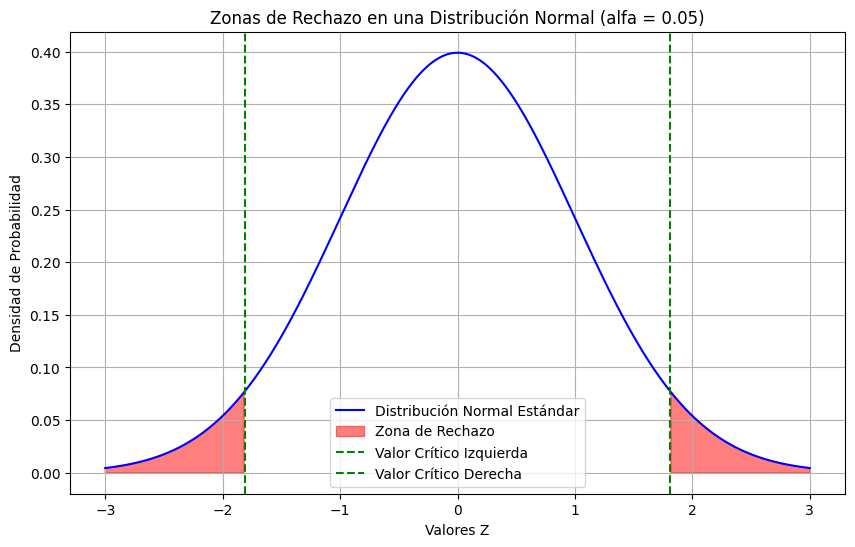

In [19]:
from scipy.stats import norm

# Nivel de significancia (alfa)
alfa = 0.07

# Crear un rango de valores para la distribución normal estándar
x = np.linspace(-3, 3, 1000)

# Calcular el valor crítico de la izquierda y derecha
valor_critico_izquierda = norm.ppf(alfa / 2)
valor_critico_derecha = norm.ppf(1 - alfa / 2)

# Crear el gráfico de la distribución normal estándar
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x), 'b-', label='Distribución Normal Estándar')

# Colorear las zonas de rechazo
plt.fill_between(x, 0, norm.pdf(x), where=(x < valor_critico_izquierda) | (x > valor_critico_derecha), color='red', alpha=0.5, label='Zona de Rechazo')

# Etiquetas y título
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.title('Zonas de Rechazo en una Distribución Normal (alfa = 0.05)')

# Líneas verticales para los valores críticos
plt.axvline(valor_critico_izquierda, color='green', linestyle='--', label='Valor Crítico Izquierda')
plt.axvline(valor_critico_derecha, color='green', linestyle='--', label='Valor Crítico Derecha')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


###Conclusión
Se rechaza $H_{0}$ porque:
*   El valor $α > p = 1.99$
*   $|t_{0}|<|t*| =  6.9$